TASK[2]. Question 1

In [13]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from collections import defaultdict
import matplotlib.pyplot as plt
import tsfel
import os

In [10]:
# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("HAR/Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    print(os)
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

# X_train=pd.read_csv(X_train)
# y_train=pd.read_csv(y_train)
# X_test=pd.read_csv(X_test)
# y_test=pd.read_csv(y_test)

# X=np.concatenate((X_train,X_test))
# y=np.concatenate((y_train,y_test))

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)

clf=DecisionTreeClassifier(criterion="gini", random_state=42, min_samples_split=4, max_features='sqrt')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
cm=confusion_matrix(y_test, y_pred)


print(f"Accuracy of raw acc. data: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"confusion Matrix: {cm}")
# print("--"*20)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'HAR\\Combined\\Train\\LAYING'

In [ ]:
def load_data(file_path):
    return np.loadtxt(file_path)


#Train a decision tree model using the raw accelerometer data: -
X_train=load_data("/content/X_train.txt")
y_train=load_data("/content/y_train.txt")
X_test=load_data("/content/X_test.txt")
y_test=load_data("/content/y_test.txt")

X=np.concatenate((X_train,X_test))
y=np.concatenate((y_train,y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)

clf=DecisionTreeClassifier(criterion="gini", random_state=42, min_samples_split=4, max_features='sqrt')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred, average='weighted')
recall=recall_score(y_test, y_pred, average='weighted')
cm=confusion_matrix(y_test, y_pred)


print(f"Accuracy of raw acc. data: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"confusion Matrix: {cm}")
print("--"*20)


#Train a decision tree model using the features obtained by TSFEL
X_train=pd.read_csv("/content/X_train_ts.csv")
y_train=pd.read_csv("/content/y_train_ts.csv")
X_test=pd.read_csv("/content/X_test_ts.csv")
y_test=pd.read_csv("/content/y_test_ts.csv")
X=np.concatenate((X_train,X_test))
y=np.concatenate((y_train,y_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)

clf=DecisionTreeClassifier(criterion="gini", random_state=42, min_samples_split=4, max_features='sqrt')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy of raw acc. data: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"confusion Matrix: {cm}")
print("--"*20)


# #Train a decision tree model using the features provided in the dataset
features="/content/X_train.txt"
feature_labels="/content/y_train.txt"
features_name="/content/features.txt"

feature_names=pd.read_csv(features_name,delim_whitespace=True,header=None)[1].tolist()

def unique(a):
    cou=defaultdict(int)
    unique_features=[]
    for feature_name in a:
        if cou[feature_name]>0:
            new_feature_name=f"{feature_name}_{cou[feature_name]}"
            unique_features.append(new_feature_name)
        else:
            unique_features.append(feature_name)
        cou[feature_name]+=1
    return unique_features

feature_names=unique(feature_names)

X = pd.read_csv(features, names=feature_names, delim_whitespace=True, dtype=np.float64)
y = pd.read_csv(feature_labels, names=['Activity'],  delim_whitespace=True, dtype=np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"confusion Matrix: {cm}")
print("--"*20)

Comparison: -  ##################
            

TASK 2 Question 2.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Depth:  2   Accuracy:  0.5310485239226331   pricision:  0.33628556107901597   recall:  0.5310485239226331


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Depth:  3   Accuracy:  0.7224295894129623   pricision:  0.6710395389950373   recall:  0.7224295894129623
Depth:  4   Accuracy:  0.8096369189005769   pricision:  0.825296009170611   recall:  0.8096369189005769
Depth:  5   Accuracy:  0.838479809976247   pricision:  0.8467699492765868   recall:  0.838479809976247
Depth:  6   Accuracy:  0.8551068883610451   pricision:  0.8611416375043899   recall:  0.8551068883610451
Depth:  7   Accuracy:  0.8639294197488971   pricision:  0.8647943347141123   recall:  0.8639294197488971
Depth:  8   Accuracy:  0.8707159823549372   pricision:  0.8733070625053528   recall:  0.8707159823549372


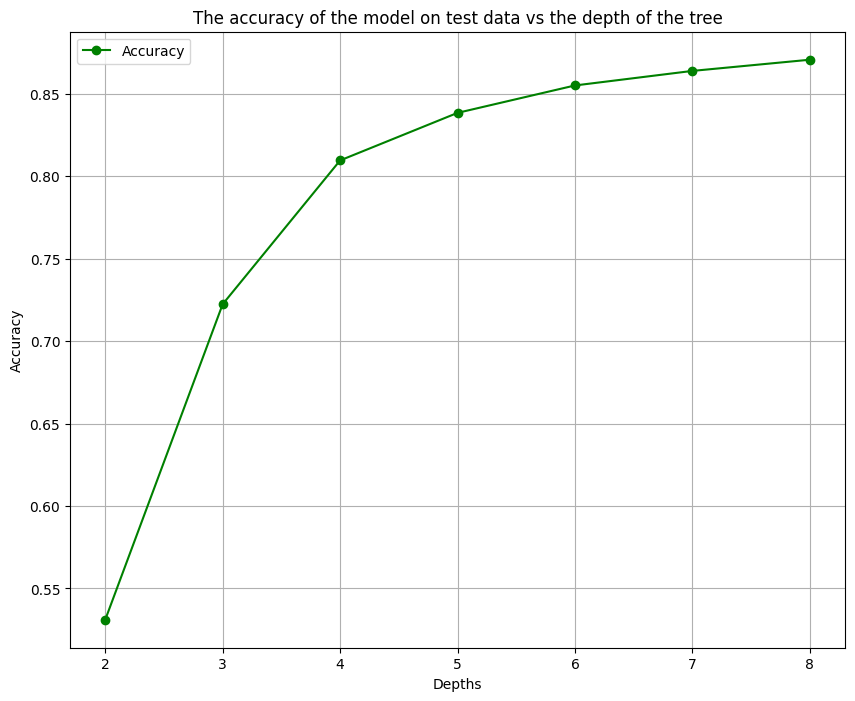

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Depth:  2   Accuracy:  0.5452073419442556   pricision:  0.349848208595933   recall:  0.5452073419442556


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Depth:  3   Accuracy:  0.7919782460910945   pricision:  0.7283802081393026   recall:  0.7919782460910945
Depth:  4   Accuracy:  0.8844323589394969   pricision:  0.8896648909947835   recall:  0.8844323589394969
Depth:  5   Accuracy:  0.8925900747790618   pricision:  0.8948977286515468   recall:  0.8925900747790618
Depth:  6   Accuracy:  0.9184228416043508   pricision:  0.9185725722261595   recall:  0.9184228416043508
Depth:  7   Accuracy:  0.9326988443235894   pricision:  0.9334832357096698   recall:  0.9326988443235894
Depth:  8   Accuracy:  0.938137321549966   pricision:  0.9388982259400486   recall:  0.938137321549966


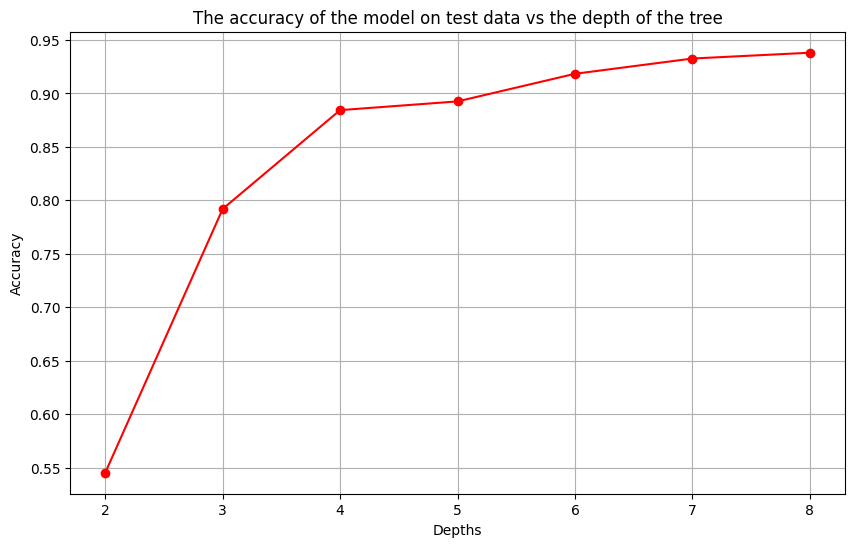

In [ ]:
#Train a decision tree model using the raw accelerometer data with varying depths (2-8): -
def load_data(file_path):
    return np.loadtxt(file_path)

X_train=load_data("/content/X_train.txt")
X_test=load_data("/content/X_test.txt")
y_train=load_data("/content/y_train.txt")
y_test=load_data("/content/y_test.txt")

depths=range(2,9)
accuracies=[]
precisions=[]
recalls=[]
# In above lists we store the accuracy, precisins and recall for different depths
for depth in range(2,9):
    clf=DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred, average='weighted')
    recall=recall_score(y_test, y_pred, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    cm=confusion_matrix(y_test, y_pred)
    print("Depth: ",depth," ","Accuracy: ",accuracy," ","pricision: ",precision," ","recall: ",recall)

plt.figure(figsize=(10, 8))
plt.plot(depths,accuracies,label='Accuracy',color="green",marker="o")
plt.title('The accuracy of the model on test data vs the depth of the tree')
plt.xlabel('Depths')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()




#Train a decision tree model using the features obtained by TSFEL with varing depths (2,8): -
import tsfel
import os
X_train=pd.read_csv("/content/X_train_ts.csv")
y_train=pd.read_csv("/content/y_train_ts.csv")
X_test=pd.read_csv("/content/X_test_ts.csv")
y_test=pd.read_csv("/content/y_test_ts.csv")
X=np.concatenate((X_train,X_test))
y=np.concatenate((y_train,y_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)

depths=range(2,9)
accuracies=[]
precisions=[]
recalls=[]


for depth in range(2,9):
    clf=DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    accuracies.append(accuracy)

    print("Depth: ",depth," ","Accuracy: ",accuracy," ","pricision: ",precision," ","recall: ",recall)

plt.figure(figsize=(10, 8))
plt.plot(depths, accuracies,color="orange",marker="o")
plt.title('The accuracy of the model on test data vs the depth of the tree')
plt.xlabel('Depths')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()




#Train a decision tree model using the features provided in the dataset with varying depths (2-8)
features="/content/X_train.txt"
feature_labels="/content/y_train.txt"
features_name="/content/features.txt"

feature_names = pd.read_csv(features_name, delim_whitespace=True, header=None)[1].tolist()

def unique(a):
    cou=defaultdict(int)
    unique_features=[]
    for feature_name in a:
        if cou[feature_name]>0:
            new_feature_name=f"{feature_name}_{cou[feature_name]}"
            unique_features.append(new_feature_name)
        else:
            unique_features.append(feature_name)
        cou[feature_name]+=1
    return unique_features

feature_names=unique(feature_names)

X=pd.read_csv(features, delim_whitespace=True, header=None, names=feature_names)
y=pd.read_csv(feature_labels, delim_whitespace=True, header=None, names=['Activity'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths=range(2,9)
accuracies=[]
recall=[]
precision=[]

for depth in range(2, 9):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred, average='weighted')
    recall=recall_score(y_test, y_pred, average='weighted')
    accuracies.append(accuracy)
    cm=confusion_matrix(y_test, y_pred)
    print("Depth: ",depth," ","Accuracy: ",accuracy," ","pricision: ",precision," ","recall: ",recall)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, color='red',marker="o",label='Accuracy')
plt.title('The accuracy of the model on test data vs the depth of the tree')
plt.xlabel('Depths')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In above question we can see that as we increase the depth, the accuracy tends to improve automatically.

TASK 2 Question 3



